Giới thiệu

Chào mừng bạn đến với phần phân tích khám phá dữ liệu (EDA) toàn diện cho cuộc thi Kaggle Playground Series – Dự đoán rủi ro tai nạn giao thông.

Mục tiêu của cuộc thi là dự đoán biến accident_risk, một giá trị liên tục trong khoảng từ 0 đến 1, thể hiện mức độ rủi ro tai nạn trên từng đoạn đường. Hiệu quả mô hình được đánh giá bằng chỉ số Root Mean Squared Error (RMSE).

Trong notebook này, chúng tôi sẽ phân tích sâu bộ dữ liệu, khám phá các mẫu và mối quan hệ tiềm ẩn, đồng thời xây dựng nền tảng cho việc phát triển một mô hình dự đoán mạnh mẽ. EDA chi tiết là bước quan trọng nhất trong bất kỳ dự án học máy nào, và mục tiêu của chúng tôi là đảm bảo phân tích chính xác, có chiều sâu và dựa trên dữ liệu.

In [0]:
spark

In [0]:
# Đọc file CSV
df_train = spark.read.csv("/Volumes/workspace/default/road/train.csv", header=True, inferSchema=True)
df_test = spark.read.csv("/Volumes/workspace/default/road/test.csv", header=True, inferSchema=True)

In [0]:
df_train.display()

id road_type num_lanes curvature speed_limit lighting weather road_signs_present public_road time_of_day holiday school_season num_reported_accidents accident_risk 0 urban 2 0.06 35 daylight rainy false true afternoon false true 1 0.13 1 urban 4 0.99 35 daylight clear true false evening true true 0 0.35 2 rural 4 0.63 70 dim clear false true morning true false 2 0.3 3 highway 4 0.07 35 dim rainy true true morning false false 1 0.21 4 rural 1 0.58 60 daylight foggy false false evening true false 1 0.56 5 highway 3 0.54 70 night foggy true false morning false true 0 0.61 6 highway 1 0.04 45 night foggy false true morning true false 2 0.2 7 highway 2 0.33 45 daylight clear false true evening false true 0 0.16 8 rural 3 0.63 25 dim clear true false evening true true 2 0.18 9 urban 4 0.38 45 dim clear true true afternoon true true 2 0.15 10 highway 1 0.45 45 dim clear false false afternoon true false 2 0.06 11 highway 4 0.26 60 daylight foggy true false evening false false 0 0.32 12 urban 4 0.84 25 dim rainy true true morning false true 2 0.37 13 rural 4 0.14 60 daylight foggy true true evening true true 1 0.28 14 highway 3 0.08 45 dim foggy false false evening true false 1 0.17 15 urban 1 0.52 60 daylight clear false true afternoon true false 1 0.39 16 highway 3 0.35 35 daylight foggy false false evening true true 1 0.23 17 rural 4 0.68 35 night clear false true morning true false 3 0.51 18 rural 3 0.72 60 night foggy true true afternoon true true 0 0.63 19 highway 2 0.86 70 night clear false false evening false false 3 0.79 20 highway 2 0.06 60 dim clear false true afternoon false false 1 0.34 21 highway 1 0.17 45 daylight foggy false false evening true true 2 0.17 22 rural 2 0.16 35 night foggy true false morning false false 1 0.29 23 urban 1 0.41 60 night foggy true false afternoon true false 0 0.68 24 highway 2 0.45 25 dim foggy true true morning false false 0 0.35 25 highway 1 0.49 70 daylight foggy true true evening false false 1 0.4 26 rural 4 0.39 70 dim clear false false evening true true 2 0.24 27 rural 3 0.7 60 daylight rainy false false morning true false 1 0.51 28 urban 3 0.12 25 night foggy true true morning false false 2 0.33 29 highway 2 0.63 70 daylight foggy false false morning false false 1 0.41 30 highway 2 0.95 45 daylight foggy true false evening true true 2 0.38 31 rural 1 0.01 60 dim clear false false evening false true 1 0.0 32 highway 1 0.45 35 night foggy true false morning true true 2 0.47 33 urban 3 0.1 45 night rainy true true morning false true 1 0.28 34 highway 1 0.24 70 daylight clear true false evening false false 1 0.28 35 highway 3 0.56 35 daylight rainy false true afternoon false false 1 0.29 36 rural 1 0.53 45 daylight foggy true true morning true true 1 0.31 37 rural 1 0.29 25 dim rainy false true afternoon true false 2 0.18 38 highway 3 0.52 45 daylight rainy false true evening true true 1 0.26 39 urban 3 0.35 25 daylight rainy false false morning false true 2 0.19 40 highway 1 0.39 70 dim clear false true morning true false 1 0.44 41 urban 2 0.73 70 daylight clear false false afternoon false true 0 0.49 42 urban 3 0.67 70 night foggy false true evening false true 0 0.73 43 highway 2 0.04 45 dim rainy true true evening false true 0 0.07 44 urban 1 0.6 45 night clear true true afternoon false false 3 0.57 45 highway 2 0.54 60 night clear false true morning true true 1 0.63 46 urban 1 0.01 35 night clear true false afternoon true false 0 0.0 47 rural 4 0.57 70 daylight clear true true morning true true 0 0.35 48 rural 1 0.54 70 dim foggy false true afternoon false false 1 0.48 49 highway 1 0.57 35 daylight foggy false true evening false false 2 0.34 50 highway 2 0.42 25 dim clear false false evening false false 0 0.12 51 highway 1 0.7 60 night foggy false true afternoon false false 1 0.68 52 highway 1 0.17 25 night rainy false false morning true false 0 0.2 53 rural 1 0.58 45 daylight foggy false true evening false true 0 0.3 54 rural 4 0.26 60 night clear true true afternoon false false 0 0.3

In [0]:
df_test.display()

id road_type num_lanes curvature speed_limit lighting weather road_signs_present public_road time_of_day holiday school_season num_reported_accidents 517754 highway 2 0.34 45 night clear true true afternoon true true 1 517755 urban 3 0.04 45 dim foggy true false afternoon true false 0 517756 urban 2 0.59 35 dim clear true false afternoon true true 1 517757 rural 4 0.95 35 daylight rainy false false afternoon false false 2 517758 highway 2 0.86 35 daylight clear true false evening false true 3 517759 highway 2 0.52 25 night rainy true true morning false true 1 517760 rural 4 0.17 70 dim clear true false afternoon true true 0 517761 urban 3 0.62 25 daylight clear false true afternoon true false 0 517762 highway 3 0.93 45 dim rainy true true evening true false 2 517763 urban 1 0.97 35 daylight clear true true evening false true 2 517764 rural 1 0.19 25 dim clear false false morning true true 2 517765 urban 4 0.32 45 dim foggy false true evening true false 1 517766 highway 1 0.39 60 daylight clear false false morning false false 2 517767 rural 2 0.52 35 daylight rainy false false evening false false 1 517768 urban 2 0.57 25 daylight clear true false morning false true 1 517769 urban 3 0.68 45 daylight rainy true false evening false false 0 517770 rural 4 0.65 25 dim rainy false true morning false true 0 517771 rural 1 0.05 70 dim rainy true false evening false false 0 517772 highway 2 0.3 45 daylight clear true true morning true true 1 517773 highway 3 0.51 35 daylight rainy false false afternoon true true 1 517774 highway 2 0.58 60 daylight clear false false morning true false 1 517775 urban 3 0.72 70 daylight rainy true false morning false false 3 517776 highway 4 0.08 25 dim foggy true true morning true false 2 517777 rural 1 0.37 35 daylight foggy false true afternoon false true 1 517778 rural 1 0.39 70 dim foggy false false afternoon false false 1 517779 highway 2 0.56 35 dim foggy false true afternoon true false 1 517780 urban 1 0.25 70 daylight rainy true false morning true true 1 517781 rural 3 0.97 35 dim rainy false true morning false false 1 517782 highway 4 0.92 25 dim clear false false morning false true 2 517783 rural 2 0.42 60 daylight clear true true evening true true 0 517784 highway 1 0.92 45 daylight clear false true evening false false 2 517785 rural 3 0.22 70 daylight clear false true afternoon false true 2 517786 urban 1 0.53 35 night rainy true true morning false true 0 517787 highway 3 0.18 45 night foggy false true evening true false 0 517788 highway 3 0.73 25 daylight rainy true true afternoon false true 1 517789 urban 3 0.45 25 daylight clear true false evening true false 2 517790 highway 4 0.64 25 dim foggy false true morning true true 0 517791 rural 2 0.67 35 daylight foggy true true morning false true 1 517792 urban 2 0.75 60 night foggy true false morning true true 1 517793 urban 4 0.26 35 daylight rainy false false morning true true 0 517794 rural 1 0.0 35 dim rainy true true evening false true 1 517795 highway 2 0.41 70 daylight clear false true afternoon true true 2 517796 rural 2 0.08 25 daylight rainy false false morning true false 2 517797 highway 3 0.22 25 daylight clear false true morning true true 1 517798 highway 3 0.63 60 dim rainy false false morning false true 2 517799 urban 3 0.15 45 daylight rainy true true evening true true 1 517800 rural 2 0.07 25 night foggy true false evening false true 2 517801 rural 2 0.89 25 daylight rainy false true evening false true 1 517802 highway 4 0.15 60 daylight rainy true true evening false false 0 517803 highway 4 0.96 25 dim rainy false false morning false true 2 517804 urban 4 0.63 35 dim foggy false true morning false false 1 517805 highway 1 0.94 60 night rainy true true morning true true 0 517806 highway 2 0.26 70 dim clear false false evening false false 1 517807 urban 2 0.81 35 night foggy false true evening false true 1 517808 rural 4 0.44 25 night rainy false false afternoon true true 1 517809 urban 3 0.63 25 daylight foggy true true evening 

In [0]:
# In ra cấu trúc dữ liệu (Schema) để xem Spark đã hiểu đúng chưa
df_train.printSchema()

root
 |-- id: integer (nullable = true)
 |-- road_type: string (nullable = true)
 |-- num_lanes: integer (nullable = true)
 |-- curvature: double (nullable = true)
 |-- speed_limit: integer (nullable = true)
 |-- lighting: string (nullable = true)
 |-- weather: string (nullable = true)
 |-- road_signs_present: boolean (nullable = true)
 |-- public_road: boolean (nullable = true)
 |-- time_of_day: string (nullable = true)
 |-- holiday: boolean (nullable = true)
 |-- school_season: boolean (nullable = true)
 |-- num_reported_accidents: integer (nullable = true)
 |-- accident_risk: double (nullable = true)



In [0]:
df_test.printSchema()

root
 |-- id: integer (nullable = true)
 |-- road_type: string (nullable = true)
 |-- num_lanes: integer (nullable = true)
 |-- curvature: double (nullable = true)
 |-- speed_limit: integer (nullable = true)
 |-- lighting: string (nullable = true)
 |-- weather: string (nullable = true)
 |-- road_signs_present: boolean (nullable = true)
 |-- public_road: boolean (nullable = true)
 |-- time_of_day: string (nullable = true)
 |-- holiday: boolean (nullable = true)
 |-- school_season: boolean (nullable = true)
 |-- num_reported_accidents: integer (nullable = true)



In [0]:
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType, DoubleType

def summarize_dataframe(df, name="df"):
    total_rows = df.count()
    total_cols = len(df.columns)

    # Đếm null + NaN

    # Numeric types để check NaN
    numeric_nan_types = (FloatType, DoubleType)

    ### Cách 1: for loop ###

    # exprs = []
    # for c in df.columns:
    #     dtype = df.schema[c].dataType
        
    #     if isinstance(dtype, numeric_nan_types):
    #         # Cột số → check cả null + NaN
    #         expr = F.count(F.when(F.col(c).isNull() | F.isnan(c), c)).alias(c)
    #     else:
    #         # Cột không phải số → chỉ check null
    #         expr = F.count(F.when(F.col(c).isNull(), c)).alias(c)
        
    #     exprs.append(expr)

    # null_stats = df.select(exprs).withColumn("row_count", F.lit(total_rows))

    ### Cách 2: list comprehension ###
    null_stats = df.select([
        F.count(
            F.when(
                F.col(c).isNull() |
                (F.isnan(c) if isinstance(df.schema[c].dataType, numeric_nan_types) else F.lit(False)),
                1
            )
        ).alias(c)
        for c in df.columns
    ]).withColumn("row_count", F.lit(total_rows))

    # Đếm duplicate rows
    duplicate_rows = total_rows - df.dropDuplicates().count()

    print(f"=== Summary for {name} ===")
    print(f"- Total rows: {total_rows}")
    print(f"- Total columns: {total_cols}")
    print(f"- Duplicate rows: {duplicate_rows}")
    print("- Null/NaN counts per column:")

    null_stats.display()


In [0]:
summarize_dataframe(df_train, "df_train")

=== Summary for df_train ===
- Total rows: 517754
- Total columns: 14
- Duplicate rows: 0
- Null/NaN counts per column:


id road_type num_lanes curvature speed_limit lighting weather road_signs_present public_road time_of_day holiday school_season num_reported_accidents accident_risk row_count 0 0 0 0 0 0 0 0 0 0 0 0 0 0 517754

In [0]:
summarize_dataframe(df_test, "df_test")

=== Summary for df_test ===
- Total rows: 172585
- Total columns: 13
- Duplicate rows: 0
- Null/NaN counts per column:


id road_type num_lanes curvature speed_limit lighting weather road_signs_present public_road time_of_day holiday school_season num_reported_accidents row_count 0 0 0 0 0 0 0 0 0 0 0 0 0 172585

In [0]:
print("Thống kê mô tả dữ liệu trên tập train:")
df_train.summary().display()


Thống kê mô tả dữ liệu trên tập train:


summary id road_type num_lanes curvature speed_limit lighting weather time_of_day num_reported_accidents accident_risk count 517754 517754 517754 517754 517754 517754 517754 517754 517754 517754 mean 258876.5 null 2.4915114127558646 0.48871919657405666 46.112574697636326 null null null 1.187969576285263 0.35237740316829813 stddev 149462.84997450036 null 1.1204343388856857 0.27256325021341926 15.788520583310287 null null null 0.8959612332282803 0.16641713134872138 min 0 highway 1 0.0 25 daylight clear afternoon 0 0.0 25% 129414 null 1 0.26 35 null null null 1 0.23 50% 258847 null 2 0.51 45 null null null 1 0.34 75% 388305 null 3 0.71 60 null null null 2 0.46 max 517753 urban 4 1.0 70 night rainy morning 7 1.0

###Nhận xét từ việc kiểm tra dữ liệu ban đầu

- **Cleaning:** Phát hiện đáng chú ý nhất là hoàn toàn không có giá trị bị thiếu trong cả hai bộ dữ liệu huấn luyện và kiểm tra.
Điều này giúp đơn giản hóa đáng kể quy trình tiền xử lý, vì chúng ta không cần xây dựng các chiến lược điền khuyết (imputation) cho dữ liệu.
- **Dataset Dimensions:** Chúng ta có 517.754 mẫu trong tập huấn luyện và 172.585 mẫu trong tập kiểm tra, mỗi mẫu bao gồm 12 đặc trưng (features), không tính cột id và biến mục tiêu accident_risk.
Đây là một lượng dữ liệu khá lớn, rất thuận lợi cho việc huấn luyện các mô hình có độ ổn định và khả năng tổng quát cao.
- **Feature Mix:** Tập dữ liệu có sự pha trộn đa dạng giữa các kiểu dữ liệu, bao gồm:
    - Dạng số (Numerical): curvature, num_lanes, speed_limit, num_reported_accidents.

    - Dạng phân loại (Categorical): road_type, lighting, weather, time_of_day.

    - Dạng logic (Boolean): road_signs_present, public_road, holiday, school_season.
    
Sự đa dạng này cho thấy rằng các mô hình có khả năng xử lý nhiều loại đặc trưng khác nhau, chẳng hạn như các mô hình tăng cường độ dốc (Gradient Boosting Models) — ví dụ LightGBM hoặc XGBoost — sẽ là ứng viên mạnh mẽ cho bài toán này.

- **Target Variable Preview:** Biến mục tiêu accident_risk có giá trị trong khoảng từ 0 đến 1, với giá trị trung bình (mean) là 0,352 và trung vị (median) là 0,340.
Sự chênh lệch nhỏ giữa hai giá trị này cho thấy phân phối có xu hướng lệch phải nhẹ, điều này sẽ được phân tích chi tiết hơn ở phần tiếp theo.

- **Identifier:** Cột id là riêng biệt cho từng mẫu nên sẽ loại bỏ trong quá trình huấn luyện.

### **Target Variable Analysis:** accident_risk
- Biến đầu tiên và quan trọng nhất cần phân tích trong bất kỳ bài toán học có giám sát nào chính là biến mục tiêu (target variable). Hiểu được phân phối, xu hướng trung tâm và độ phân tán của nó là yếu tố then chốt để lựa chọn mô hình, đánh giá hiệu quả và xác định xem có cần biến đổi dữ liệu hay không.

- Trong bước này, chúng ta sẽ:
  - Trực quan hóa phân phối của accident_risk bằng biểu đồ histogram và biểu đồ KDE (Kernel Density Estimate).

  - Kiểm tra các đặc trưng thống kê như độ lệch (skewness) và độ nhọn (kurtosis).

  - Sử dụng boxplot để xem độ phân tán và phát hiện điểm ngoại lai (outliers).

- Việc hiểu sâu biến mục tiêu sẽ giúp chúng ta trả lời các câu hỏi như:

  - Phân phối có chuẩn hay không?

  - Có bị lệch không?

  - Có xuất hiện những điểm bất thường hay khoảng trống trong dữ liệu không?

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#Get sample (convert spark to pandas)
df_train_sample = df_train.sample(
    withReplacement=False,
    fraction=0.02,
    seed=42
).toPandas()

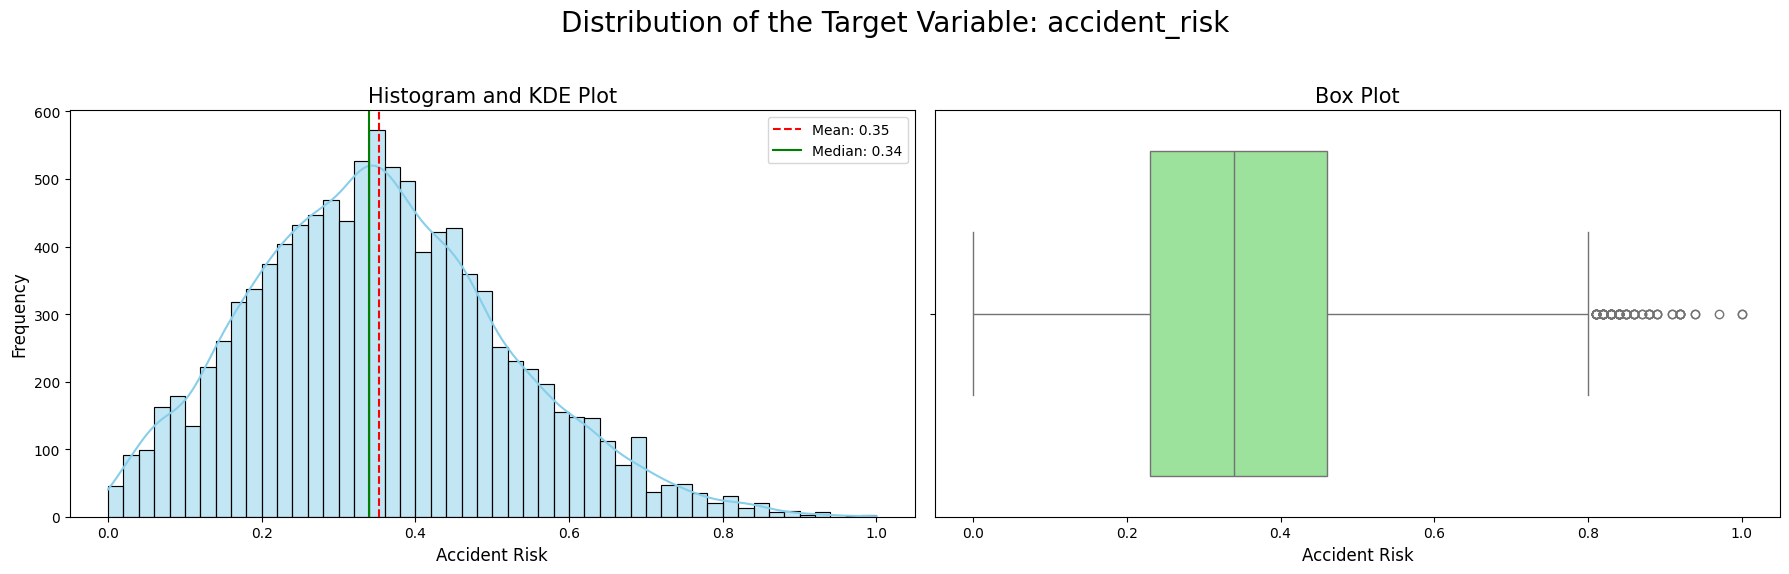

--- Statistical Properties of accident_risk ---
Skewness: 0.3751
Kurtosis: -0.0192


In [0]:
# --- Set up the plotting area ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Distribution of the Target Variable: accident_risk', fontsize=20)

# --- Plot 1: Histogram and KDE ---
sns.histplot(df_train_sample['accident_risk'], kde=True, ax=axes[0], bins=50, color='skyblue')
axes[0].set_title('Histogram and KDE Plot', fontsize=15)
axes[0].set_xlabel('Accident Risk', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(df_train_sample['accident_risk'].mean(), color='red', linestyle='--', label=f"Mean: {df_train_sample['accident_risk'].mean():.2f}")
axes[0].axvline(df_train_sample['accident_risk'].median(), color='green', linestyle='-', label=f"Median: {df_train_sample['accident_risk'].median():.2f}")
axes[0].legend()


# --- Plot 2: Box Plot ---
sns.boxplot(x=df_train_sample['accident_risk'], ax=axes[1], color='lightgreen')
axes[1].set_title('Box Plot', fontsize=15)
axes[1].set_xlabel('Accident Risk', fontsize=12)

# --- Display the plots ---
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Print Skewness and Kurtosis ---
skewness = df_train_sample['accident_risk'].skew()
kurtosis = df_train_sample['accident_risk'].kurt()

print(f"--- Statistical Properties of accident_risk ---")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

### Quan sát từ phân tích biến mục tiêu
**Phân tích sâu về biến accident_risk cho thấy một số điểm quan trọng:**
- **Hình dạng phân phối**: Biến mục tiêu có phân phối đơn đỉnh (một đỉnh) và hơi lệch phải. Điều này được xác nhận bởi:
  - Phần đuôi của biểu đồ histogram kéo dài về phía bên phải.
  - Giá trị trung bình (0.35) lớn hơn một chút so với trung vị (0.34).
  - Giá trị skewness dương: 0.3751.

- **Xu hướng trung tâm**:
Phần lớn giá trị accident_risk tập trung trong khoảng 0.2 đến 0.5, với tần suất cao nhất rơi vào khoảng 0.34.

- **Độ nhọn (Kurtosis)**:
Giá trị kurtosis là -0.0192, rất gần với 0 — điều này cho thấy độ nhọn của phân phối tương tự phân phối chuẩn (mesokurtic). Nghĩa là phân phối không quá nhọn cũng không quá bẹt.

- **Giá trị ngoại lai (Outliers)**:
Biểu đồ boxplot chỉ rõ sự xuất hiện của các outlier ở phía cuối phân phối, đặc biệt là những giá trị lớn hơn khoảng 0.8. Mặc dù các mô hình dạng cây như LightGBM khá vững vàng trước outliers, việc nhận biết chúng vẫn rất hữu ích.

**Kết luận**:
Phân phối của biến mục tiêu nhìn chung là “lành tính”, không có độ lệch quá lớn đến mức cần thực hiện biến đổi ngay lập tức. Chúng ta có thể tiếp tục sử dụng biến target này như hiện tại, chỉ lưu ý rằng nó hơi lệch phải nhẹ.

### Phân tích đơn biến: Khám phá từng đặc trưng

Phân tích đơn biến (Univariate Analysis) là quá trình xem xét từng đặc trưng một cách độc lập để hiểu rõ các đặc điểm của chúng. Điều này giúp chúng ta nhận diện phân phối, phát hiện bất thường và có cái nhìn tổng quan về dữ liệu đang làm việc.

Chúng ta sẽ chia phần phân tích này thành hai nhóm:

**1. Các đặc trưng dạng Categorical & Boolean:**
Tần suất xuất hiện của từng nhóm là bao nhiêu? Có nhóm nào quá hiếm hoặc quá chiếm ưu thế không?


**2. Các đặc trưng dạng Numerical:**
Các giá trị phân bố như thế nào? Phạm vi và xu hướng trung tâm ra sao?

Hãy bắt đầu bằng việc trực quan hóa các đặc trưng dạng categorical và boolean bằng các biểu đồ tần suất

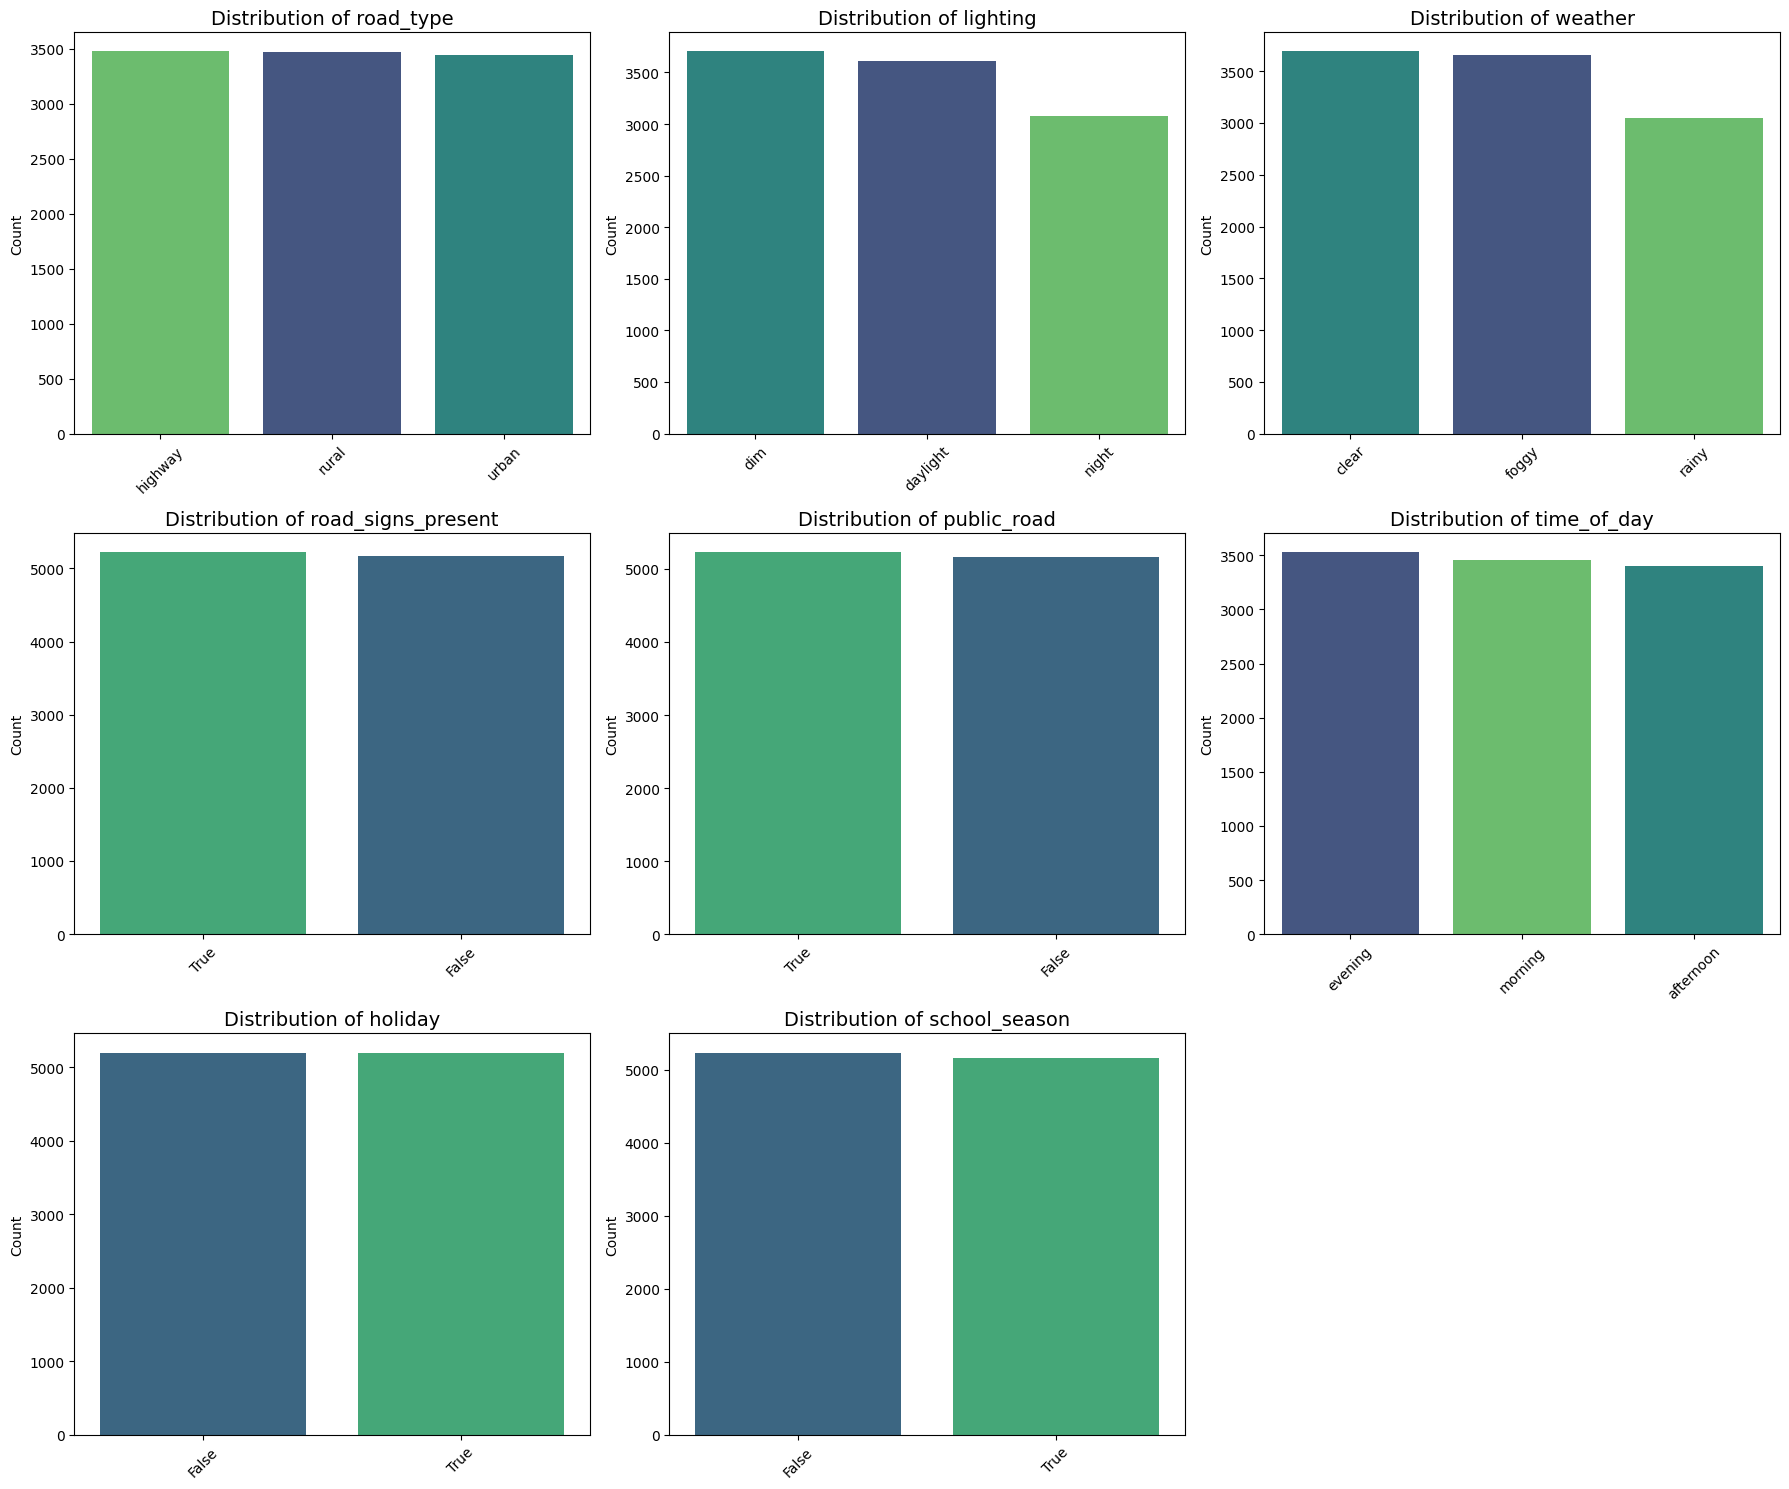

In [0]:
# --- Identify Categorical and Boolean Columns ---
categorical_cols = df_train_sample.select_dtypes(include=['object', 'bool']).columns

# --- Calculate the number of rows and columns for the subplot grid ---
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# --- Create Subplots ---
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

# --- Generate a count plot for each categorical column ---
for i, col in enumerate(categorical_cols):
    sns.countplot(
        data=df_train_sample,
        x=col,
        hue=col,           # thêm hue
        legend=False,      # tắt legend để giống kết quả cũ
        palette='viridis', # palette sẽ apply cho từng category
        order=df_train_sample[col].value_counts().index,
        ax=axes[i]
    )

    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# --- Hide unused subplots ---
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### Những quan sát từ phân tích các đặc trưng Categorical & Boolean

Phân tích các đặc trưng dạng categorical và boolean cho thấy một cấu trúc dữ liệu nhất quán và cân bằng ở mức độ rất cao. Mẫu phân phối này hiếm khi xuất hiện trong các bộ dữ liệu thực tế và hoàn toàn phù hợp với nhận định của cuộc thi rằng dữ liệu được tạo ra một cách tổng hợp (synthetic).

- **Các đặc trưng nhị phân cân bằng (Balanced Binary Features)**: Các đặc trưng nhị phân như road_signs_present, public_road, holiday, và school_season đều có sự phân chia gần như hoàn hảo theo tỷ lệ 50/50 giữa hai nhóm giá trị.
Sự cân bằng này giúp loại bỏ hoàn toàn các lo ngại về mất cân bằng lớp – một vấn đề thường gặp trong dữ liệu thực tế.

- **Phân phối đồng đều ở các đặc trưng đa lớp (Evenly Distributed Multi-Class Features)**:
Tương tự, các đặc trưng đa lớp như road_type, lighting, weather, và time_of_day đều thể hiện sự phân phối cực kỳ đồng đều giữa các nhóm giá trị.
Mỗi category xuất hiện với tần suất gần như tương đương, cho thấy dữ liệu được thiết kế có chủ đích nhằm đảm bảo sự cân bằng.

- **Ảnh hưởng đối với việc xây dựng mô hình (Implications for Modeling)**:
Mức độ cân bằng cao này mang lại nhiều lợi ích quan trọng cho quá trình xây dựng mô hình:

  - Không cần sử dụng các kỹ thuật xử lý mất cân bằng như SMOTE, over-sampling hay under-sampling.

  - Mô hình sẽ học từ số lượng mẫu đồng đều giữa các nhóm, giảm thiểu nguy cơ thiên lệch đối với bất kỳ lớp nào.

  - Các phương pháp mã hóa tiêu chuẩn, đặc biệt là One-Hot Encoding, sẽ hoạt động một cách ổn định và hiệu quả.



### Phân tích đơn biến: Các đặc trưng dạng số
Sau khi hoàn thành phân tích đối với các đặc trưng dạng categorical và boolean, chúng ta chuyển sang xem xét nhóm đặc trưng dạng số. Việc hiểu rõ đặc tính phân phối của các biến số là vô cùng quan trọng, bởi nó giúp nhận diện mức độ lệch (skewness), phát hiện các giá trị ngoại lai (outliers), và đánh giá liệu có cần áp dụng các phương pháp biến đổi dữ liệu cho một số mô hình nhất định hay không.

Trong phần này, chúng ta sẽ trực quan hóa phân phối của từng đặc trưng số, bao gồm:

- num_lanes

- curvature

- speed_limit

- num_reported_accidents

Các biểu đồ histogram được sử dụng nhằm phân tích hình dạng phân phối, mức độ phân tán, và xu hướng trung tâm của từng biến. Thông tin này đóng vai trò nền tảng cho các bước tiền xử lý và xây dựng mô hình sau này.



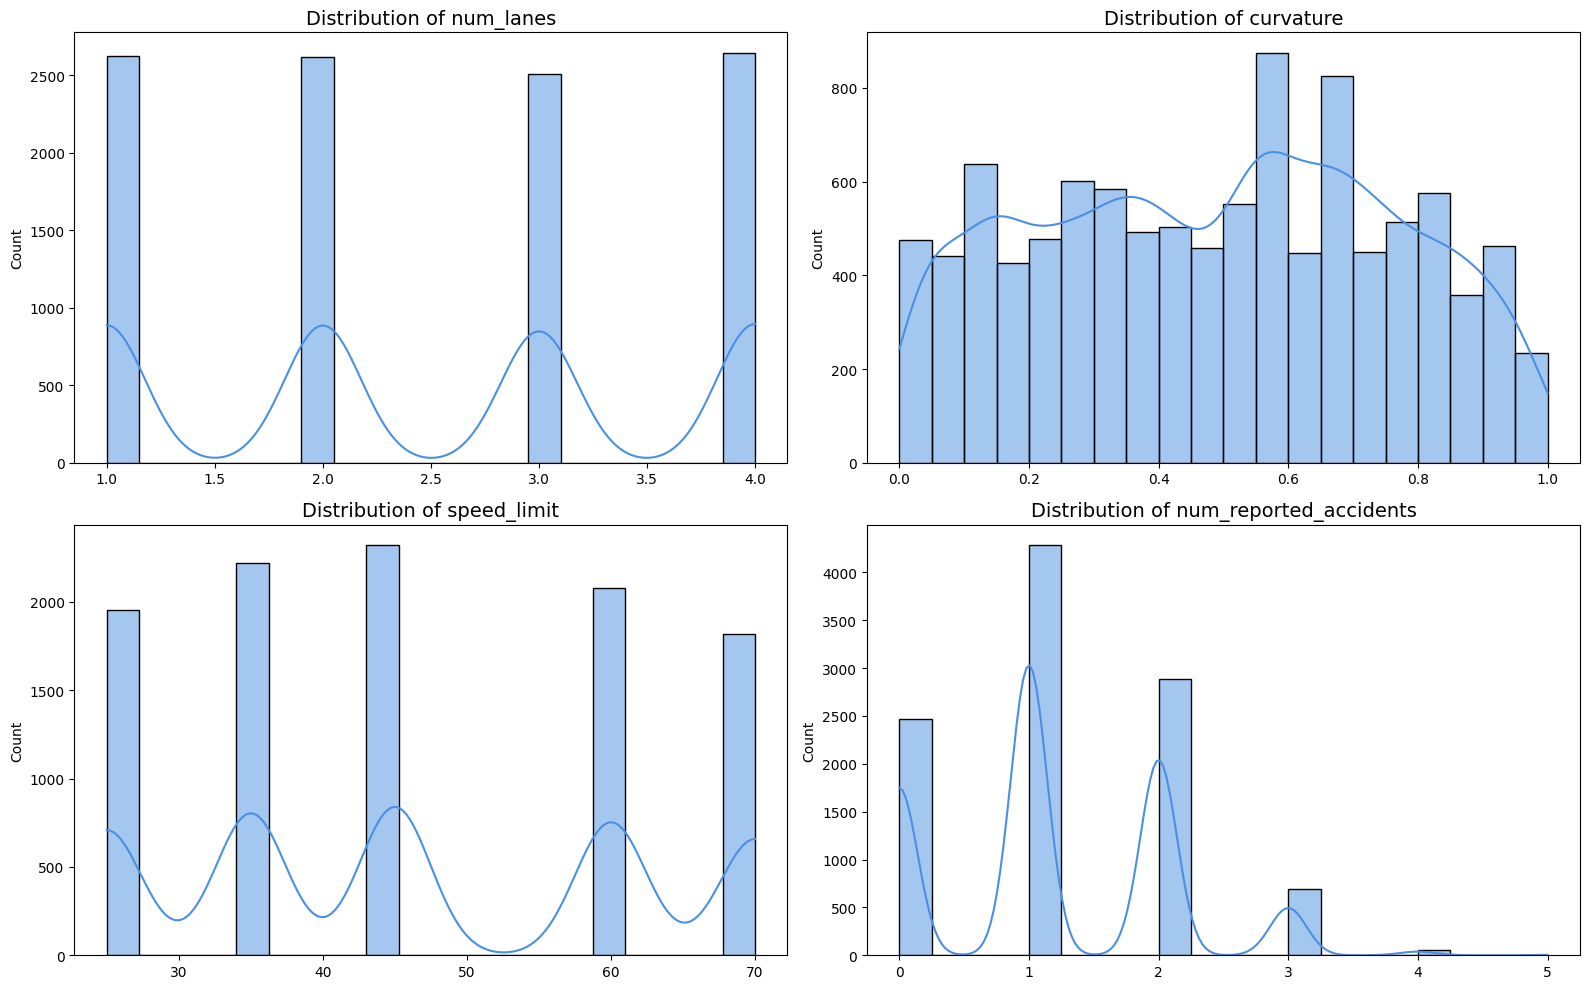

In [0]:
# --- Identify Numerical Columns (excluding id and target) ---
numerical_cols = df_train_sample.select_dtypes(include=np.number).columns.drop(['id', 'accident_risk'])

# --- Calculate the number of rows and columns for the subplot grid ---
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# --- Create Subplots ---
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
axes = axes.flatten()

# --- Generate a histogram for each numerical column ---
for i, col in enumerate(numerical_cols):
    sns.histplot(
        data=df_train_sample,
        x=col,
        ax=axes[i],
        kde=True,
        bins=20,
        color='#4A90E2'  # màu xanh pastel dịu mắt
    )
    
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# --- Hide unused subplots ---
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### Những quan sát từ phân tích các đặc trưng dạng số
Phân phối của các đặc trưng dạng số tiếp tục củng cố bằng chứng rằng bộ dữ liệu có nguồn gốc tổng hợp (synthetic), đồng thời cung cấp những gợi ý quan trọng cho quá trình feature engineering và xây dựng mô hình.

1. **Phân biệt đặc trưng rời rạc và liên tục (Discrete vs. Continuous)**

Chúng ta có thể chia các đặc trưng số thành hai nhóm rõ rệt:

**Đặc trưng rời rạc (Discrete Features)**:

num_lanes và speed_limit không phải là biến liên tục; chúng chỉ nhận một tập giá trị nguyên cố định. Do đó, phân phối của chúng giống với dữ liệu categorical hơn là numerical truyền thống.

- num_lanes: Các giá trị (1, 2, 3, 4) được phân phối gần như hoàn toàn đồng đều.

- speed_limit: Chỉ gồm một vài giá trị xác định (25, 35, 45, 60, 70), trong đó 35 và 45 xuất hiện nhiều hơn một chút.

**Đặc trưng liên tục (Continuous Feature):**

curvature là một biến liên tục thực sự, có giá trị trong khoảng 0 đến 1. Phân phối của nó khá phức tạp và có dạng đa đỉnh (multi-modal), không theo một mẫu đơn giản nào, nhưng không có độ lệch lớn.

**Đặc trưng dạng đếm (Count Feature):**

num_reported_accidents là biến đếm, có phân phối lệch phải mạnh. Phần lớn quan sát chỉ có 0, 1 hoặc 2 vụ tai nạn được báo cáo. Các giá trị trên 3 xuất hiện rất hiếm.

2. **Đặc trưng dự đoán mạnh tiềm năng**

num_reported_accidents về mặt trực quan rất gần với biến mục tiêu accident_risk. Với tín hiệu mạnh như vậy, ta có thể dự đoán rằng đây sẽ là một trong những đặc trưng quan trọng nhất đối với mô hình.

3. **Hệ quả đối với quá trình mô hình hóa (Modeling Implications)**

Với bản chất rời rạc của num_lanes và speed_limit, ta có thể xem xét xử lý hai đặc trưng này như categorical (ví dụ: One-Hot Encoding) thay vì coi chúng như các biến thứ bậc (ordinal). Điều này có thể giúp mô hình đạt hiệu suất tốt hơn.

### Phân tích hai biến: Mối quan hệ giữa đặc trưng và biến mục tiêu

Ở bước này, chúng ta chuyển từ việc quan sát từng biến độc lập sang phân tích mối quan hệ giữa các đặc trưng và biến mục tiêu. Đây là phần quan trọng nhất, giúp chúng ta hiểu mức độ ảnh hưởng của từng đặc trưng lên accident_risk, từ đó xác định các đặc trưng có khả năng dự đoán mạnh.

Chúng ta sẽ bắt đầu bằng cách trực quan hóa mối quan hệ giữa các đặc trưng categorical/boolean và biến mục tiêu. Box plot là lựa chọn lý tưởng để thể hiện phân phối của accident_risk theo từng nhóm giá trị trong mỗi đặc trưng.

Ở đây, chúng ta sẽ tập trung quan sát hai điểm chính:

1. **Sự khác biệt về trung vị (Differences in Medians)**

Các nhóm trong một đặc trưng có mức trung vị accident_risk khác nhau hay không?
→ Nếu có, điều đó cho thấy đặc trưng này có khả năng phân tách tốt mức độ rủi ro.

2. **Sự khác biệt về độ trải (Differences in Spread)**

Độ phân tán của accident_risk ở mỗi nhóm có khác nhau không?
→ Một số category có thể có mức độ biến thiên lớn hơn, cho thấy sự không ổn định hoặc mức độ rủi ro dao động mạnh.

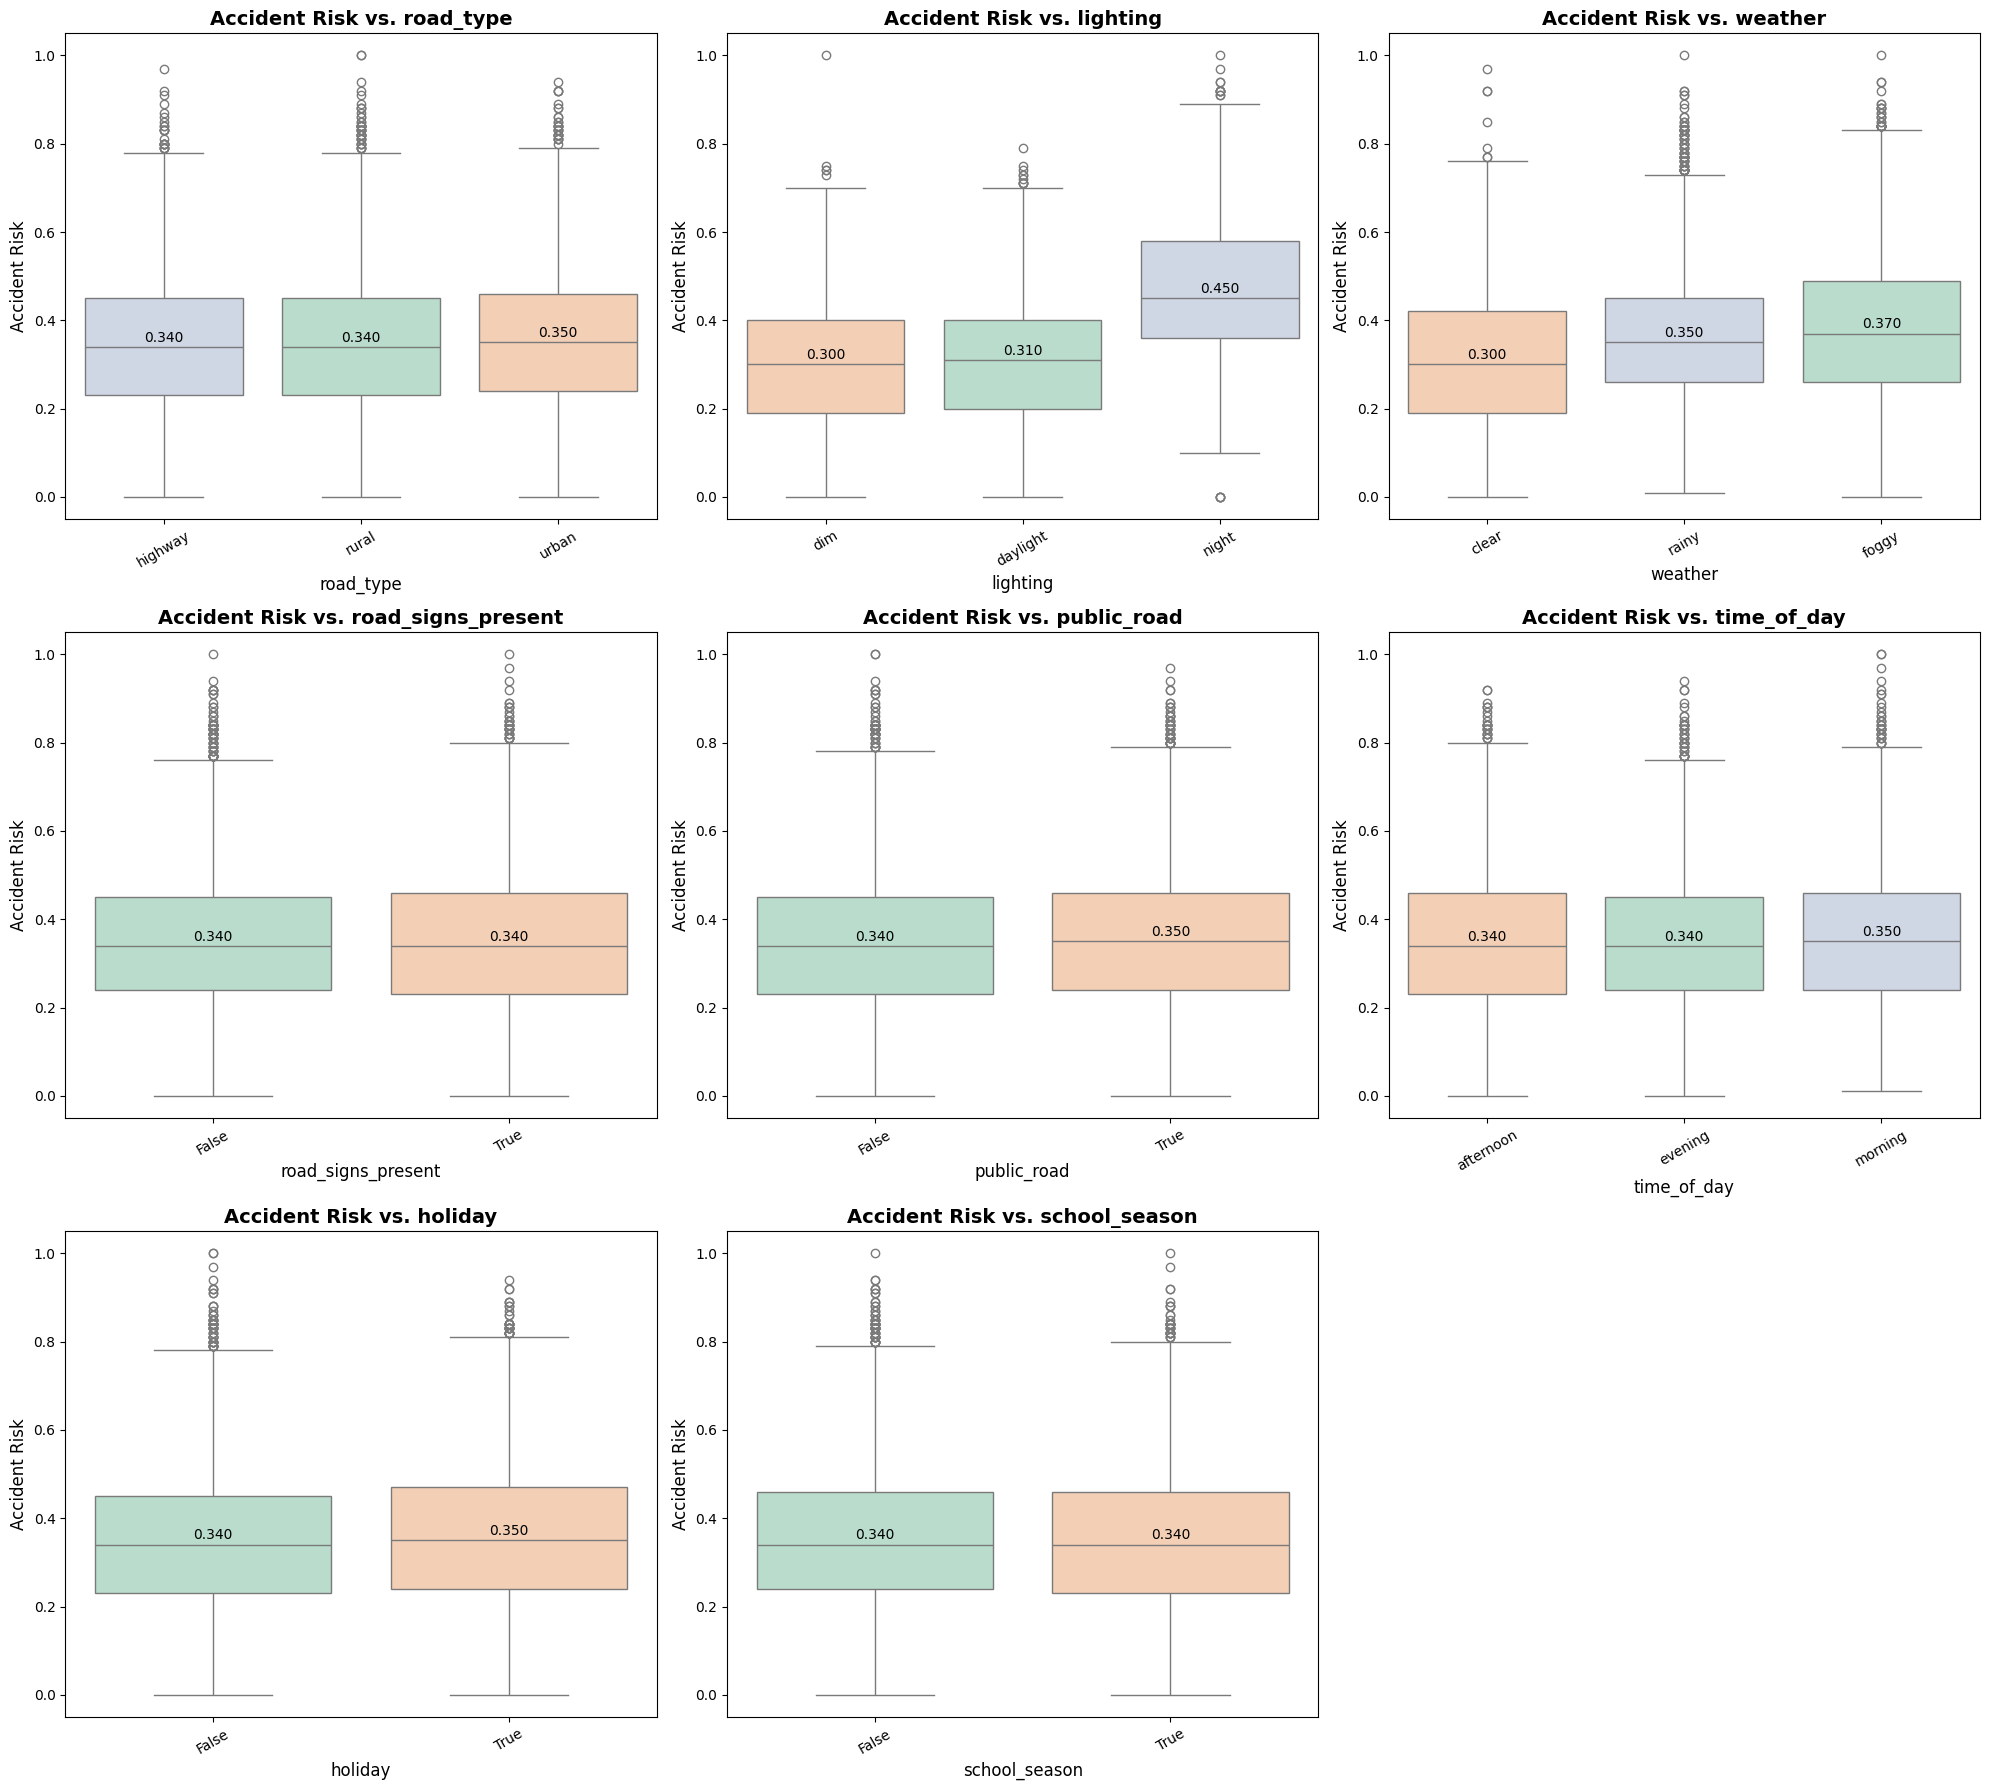

In [0]:
# --- Identify Categorical and Boolean Columns ---
categorical_cols = df_train_sample.select_dtypes(include=['object', 'bool']).columns

# --- Calculate the number of rows and columns for the subplot grid ---
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# --- Create Subplots ---
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()

# --- Generate a boxplot and print medians ---
for i, col in enumerate(categorical_cols):

    # Compute median per category
    medians = (
        df_train_sample.groupby(col)['accident_risk']
        .median()
        .sort_values()
    )
    order = medians.index  # sorted categories

    # Draw boxplot
    sns.boxplot(
        data=df_train_sample,
        x=col,
        y='accident_risk',
        hue=col,            
        legend=False,       
        palette='Pastel2',
        order=order,
        ax=axes[i]
    )

    # Add median text labels
    for xi, category in enumerate(order):
        median_value = medians[category]
        axes[i].text(
            xi, median_value + 0.005,     # slight offset so text sits above median line
            f"{median_value:.3f}",
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

    axes[i].set_title(f'Accident Risk vs. {col}', fontsize=14, weight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Accident Risk', fontsize=12)
    axes[i].tick_params(axis='x', rotation=30)

# --- Hide unused subplot areas ---
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### Những quan sát từ Bivariate Analysis (Categorical Features)

Ở tất cả các biểu đồ, ngoại lai chỉ xuất hiện ở phía trên. Điều này cho thấy dữ liệu bị lệch phải (right-skewed). Tức là, dù điều kiện lái xe tốt hay xấu, luôn có một nhóm nhỏ các trường hợp có rủi ro cực cao (gần 1.0) bất chấp hoàn cảnh. Điều này gợi ý rằng có những yếu tố khác (ví dụ: hành vi tài xế say xỉn, phóng nhanh) gây ra rủi ro cao mà các biến số môi trường này không giải thích hết được.

**A. Nhóm có ảnh hưởng MẠNH (Strong Drivers)**
**1. Lighting (Ánh sáng): Biến số phân loại mạnh nhất.**

Night (Đêm): Trung vị nhảy vọt lên 0.450. Không chỉ rủi ro trung bình cao, mà cái hộp (IQR) cũng dài hơn, nghĩa là độ biến động rủi ro vào ban đêm rất lớn (khó lường hơn).

Dim (Mờ/Chập choạng) & Daylight (Ban ngày): Trung vị thấp (~0.300 - 0.310).

**Kết luận:** Ánh sáng yếu vào ban đêm là tác nhân chính đẩy rủi ro lên cao. Đáng ngạc nhiên là điều kiện "Dim" (mờ) lại có rủi ro thấp nhất (0.300), có thể do tài xế cẩn thận hơn vào lúc chập choạng tối so với ban ngày chủ quan?

**2. Weather (Thời tiết): Có xu hướng tăng tuyến tính rõ rệt.**

Clear (Quang đãng): Median 0.300 (Thấp nhất).

Rainy (Mưa): Median 0.350 (Tăng 16.6% so với trời quang).

Foggy (Sương mù): Median 0.370 (Cao nhất nhóm thời tiết).

**Kết luận:** Tầm nhìn (Foggy) dường như nguy hiểm hơn cả độ trơn trượt (Rainy) trong tập dữ liệu này.

**B. Nhóm có ảnh hưởng YẾU hoặc KHÔNG RÕ RÀNG (Weak/Null Drivers)**
Các biến số dưới đây cho thấy sự khác biệt không đáng kể về mặt thống kê (các hộp trông y hệt nhau).

**3. Road Type (Loại đường):**

Highway (0.340) vs. Rural (0.340) vs. Urban (0.350).

Phân tích: Sự chênh lệch chỉ 0.01 là rất nhỏ. Điều này khá lạ, vì thông thường đường cao tốc (highway) thường có tần suất tai nạn thấp hơn nhưng mức độ nghiêm trọng cao hơn, còn đô thị (urban) thì ngược lại. Có vẻ mô hình tính toán "Rủi ro" này đang gộp chung hoặc san bằng sự khác biệt đó.

**4. Public Road (Đường công cộng) & Road Signs (Biển báo):**

Cả hai biểu đồ đều cho thấy True hay False thì rủi ro vẫn quanh quẩn 0.340.

Phân tích sâu: Việc có biển báo (road_signs_present = True) không làm giảm rủi ro trung bình trong dữ liệu này. Điều này có thể do biển báo thường được đặt ở những nơi vốn dĩ đã nguy hiểm (khúc cua, giao lộ), nên sự hiện diện của nó đi kèm với rủi ro nội tại của địa hình đó.

**5. Time of Day (Thời gian trong ngày):**

Afternoon/Evening/Morning đều xấp xỉ 0.340 - 0.350.

Mâu thuẫn dữ liệu: Ở biểu đồ Lighting, "Night" rủi ro rất cao. Tuy nhiên ở đây, "Evening" (Buổi tối) lại có rủi ro thấp (0.340) ngang với ban ngày.

Giả thuyết: Có thể định nghĩa "Evening" ở đây là chập tối (trước khi trời tối hẳn), hoặc dữ liệu Time of Day không tương quan chặt chẽ với điều kiện ánh sáng thực tế như biến Lighting.

**6. Holiday & School Season:**

Không có sự khác biệt (đều ~0.340). Yếu tố mùa vụ hay ngày lễ không tác động đến chỉ số rủi ro này.

**C. Tổng hợp**

**- Đánh giá "Sức mạnh" của biến (Feature Importance Evaluation)**

Dựa trên biểu đồ, ta có thể phân loại các biến đầu vào để có chiến lược xử lý:

**Biến Tiềm năng cao (High Potential Features):**

Lighting và Weather: Đây là hai biến có Signal-to-Noise Ratio (Tỷ lệ tín hiệu trên nhiễu) tốt nhất. Sự thay đổi giữa các nhóm (ví dụ: Night vs Daylight) tạo ra sự thay đổi rõ rệt về Target (Median thay đổi lớn).

Hành động: Giữ nguyên và ưu tiên đưa vào mô hình. Đây sẽ là những "Key Drivers" (Yếu tố dẫn dắt) cho kết quả dự báo.

**Biến Tín hiệu yếu (Low Correlation Features):**

Road_type, Road_signs, Public_road, Holiday, School_season: Các biểu đồ hộp gần như thẳng hàng, Median không đổi. Về mặt thống kê mô tả, các biến này không có sự tương quan tuyến tính rõ ràng với Target.

Hành động:

Không vội loại bỏ: Đừng xóa ngay. Có thể chúng không tác động đơn lẻ (main effect), nhưng sẽ tác động khi kết hợp (interaction effect). Ví dụ: Road_type có thể không quan trọng, nhưng Road_type = Highway KẾT HỢP VỚI Weather = Foggy có thể đẩy rủi ro lên cực cao.

Kiểm định thống kê: Chạy kiểm định ANOVA (nếu phân phối chuẩn) hoặc Kruskal-Wallis (nếu không chuẩn) để xem sự khác biệt giữa các nhóm có ý nghĩa thống kê (p-value < 0.05) hay không. Nếu p-value cao, cân nhắc loại bỏ để giảm chiều dữ liệu (Dimensionality Reduction).

**- Chiến lược Kỹ thuật đặc trưng (Feature Engineering Strategy)**
Các biểu đồ cho thấy dữ liệu thô (raw data) có thể chưa đủ tốt, cần biến đổi:

**Xử lý biến Time_of_day (Binning/Re-grouping):**

Vấn đề: Biến này đang mâu thuẫn với Lighting. "Evening" (chiều tối) lại có rủi ro thấp ngang "Morning", trong khi Lighting=Night rủi ro rất cao.

Giải pháp: Cách chia nhóm hiện tại (Morning/Afternoon/Evening) có thể quá rộng. Hãy thử chia lại theo giờ cụ thể (ví dụ: Hour 0-23) hoặc tạo bin mới: "Rush Hour" (Giờ cao điểm) vs "Off-peak" (Ngoài cao điểm).

**Tạo biến tương tác (Interaction Features):**

Do nhiều biến đơn lẻ có biểu đồ "phẳng" (không tác động), nên thử tạo các biến ghép.

Ví dụ: Tạo biến mới Night_Highway (Kết hợp Lighting=Night và Road_type=Highway). Có thể rủi ro sẽ tập trung ở các tổ hợp cụ thể này thay vì từng biến riêng lẻ.

**- Lựa chọn Mô hình (Model Selection)**
Dựa trên hình dáng phân phối của Target (Accident Risk) trong các biểu đồ:

Vấn đề phân phối lệch (Skewed Distribution):

Dữ liệu bị lệch phải (Right-skewed) với nhiều Outliers phía trên (các chấm tròn). Phần lớn dữ liệu tập trung ở rủi ro thấp (0.2 - 0.4), nhưng đuôi giá trị cao kéo dài đến 1.0.

**Hệ quả chọn mô hình:**

Linear Regression (Hồi quy tuyến tính): Sẽ hoạt động kém vì giả định phân phối chuẩn của phần dư (residuals) có thể bị vi phạm do các outliers và độ lệch này.

Tree-based Models (Random Forest, XGBoost, LightGBM): Đây là lựa chọn tối ưu. Các mô hình cây quyết định (Decision Trees) xử lý rất tốt các biến phân loại, không yêu cầu dữ liệu tuân theo phân phối chuẩn, và đặc biệt giỏi trong việc bắt các điểm "Outliers" cũng như tự động học được các tương tác chéo (như Rain + Night) mà không cần ta phải tạo biến thủ công quá nhiều.

**Tóm lại:** Kết quả Bivariate Analysis này cho thấy ta đang có 2 biến "gánh team" (Lighting, Weather) và một loạt các biến "vệ tinh" yếu. Chiến lược tiếp theo nên là dùng mô hình phi tuyến tính (như Gradient Boosting) để khai thác tối đa thông tin từ các biến yếu này thông qua các tương tác phức tạp.


### **Bivariate Analysis: Numerical Features vs. Target**

Chúng ta tiếp tục phân tích hai biến bằng cách khảo sát mối quan hệ giữa các đặc trưng dạng số và biến mục tiêu accident_risk. Trong phần này, scatter plot là công cụ trực quan lý tưởng, giúp chúng ta nhận diện các xu hướng, mức độ tương quan và cả những quan hệ phi tuyến tiềm ẩn.

Tính toán hệ số tương quan Pearson

Song song với việc trực quan hóa, chúng ta sẽ tính hệ số tương quan Pearson giữa từng đặc trưng số và accident_risk.
Chỉ số này cho chúng ta biết:

- độ mạnh của mối quan hệ tuyến tính,

- chiều hướng (cùng chiều hay ngược chiều),

- giá trị gần 1 hoặc -1 → tương quan mạnh,

- giá trị gần 0 → gần như không có quan hệ tuyến tính.

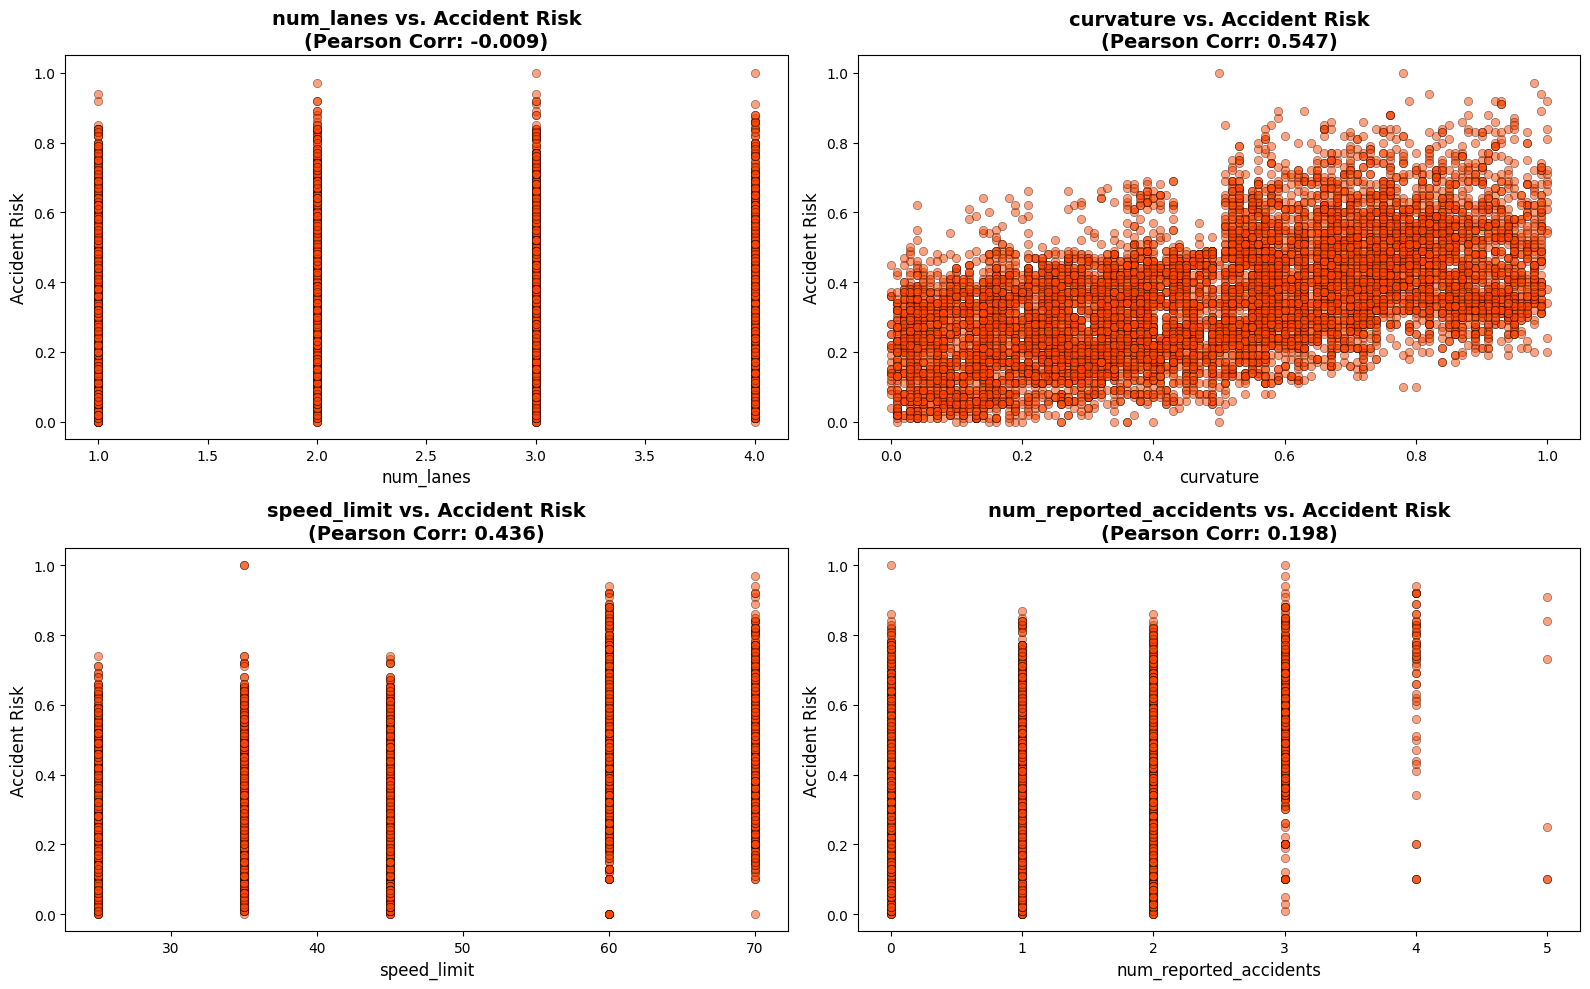

In [0]:
# --- Identify Numerical Columns (excluding id and target) ---
numerical_cols = df_train_sample.select_dtypes(include=np.number).columns.drop(['id', 'accident_risk'])

# --- Calculate the number of rows and columns for the subplot grid ---
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols # Ceiling division

# --- Create Subplots ---
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
axes = axes.flatten() # Flatten the axes array for easy iteration

# --- Generate a scatter plot for each numerical column vs. the target ---
for i, col in enumerate(numerical_cols):
    # Calculate Pearson Correlation
    correlation = df_train_sample[col].corr(df_train_sample['accident_risk'])
    
    sns.scatterplot(data=df_train_sample, x=col, y='accident_risk', ax=axes[i], alpha=0.5, color='orangered', edgecolor='black')
    axes[i].set_title(f'{col} vs. Accident Risk\n(Pearson Corr: {correlation:.3f})', fontsize=14, weight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Accident Risk', fontsize=12)

# --- Hide any unused subplots ---
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# --- Display the plots ---
plt.tight_layout()
plt.show()

Từ các chỉ số Pearson Correlation và hình dáng phân bố (scatter plot), chúng ta có thể thấy bức tranh rõ ràng về độ quan trọng của từng biến.

**1. Phân tích chi tiết từng biến (Feature Analysis)**

**A. Curvature (Độ cong của đường) - Biến quan trọng nhất**

Pearson Corr: 0.547 (Tương quan dương trung bình - khá).

Quan sát hình ảnh:

Đây là biểu đồ thú vị nhất. Có một xu hướng tăng rõ rệt: đường càng cong, rủi ro càng cao.

Phát hiện đặc biệt (Critical Finding): Có một sự đứt gãy (discontinuity) hoặc bước nhảy vọt tại giá trị curvature ≈ 0.5.

Với curvature < 0.5: Rủi ro tập trung ở mức thấp đến trung bình (0.0 - 0.5).

Với curvature > 0.5: Rủi ro nhảy vọt lên mức cao (0.4 - 1.0).

Mối quan hệ này không hoàn toàn tuyến tính. Nó giống một hàm bậc thang (step function) hơn. Điều này gợi ý rằng có một ngưỡng "nguy hiểm" tại 0.5. Các mô hình tuyến tính (Linear Regression) sẽ gặp khó khăn để bắt được bước nhảy này nếu không biến đổi dữ liệu, nhưng các mô hình cây (Decision Tree/Random Forest) sẽ học cực tốt điểm cắt này.

**B. Speed Limit (Giới hạn tốc độ) - Biến quan trọng thứ hai**
Pearson Corr: 0.436 (Tương quan dương trung bình).

Dữ liệu bị phân thành các cột rời rạc (do giới hạn tốc độ thường là số tròn chục/năm: 25, 35, 45, 60, 70).

Có sự phân tách nhóm rõ rệt:

Nhóm tốc độ thấp (25, 35, 45): Rủi ro phân bố trải dài nhưng chặn trên (max) thường dưới 0.8.

Nhóm tốc độ cao (60, 70): Rủi ro dồn lên cao hẳn, mật độ điểm tập trung dày đặc ở vùng rủi ro > 0.6.

Đây là biến có tính chất Ordinal (thứ tự) hơn là Continuous thuần túy. Tốc độ cao rõ ràng kéo theo rủi ro lớn.

**C. Num Reported Accidents (Số vụ tai nạn đã báo cáo) - Tín hiệu yếu**
Pearson Corr: 0.198 (Tương quan dương yếu).

Quan sát hình ảnh:

Mặc dù logic thông thường là "nơi hay xảy ra tai nạn thì rủi ro cao", nhưng dữ liệu cho thấy mối liên hệ này không quá chặt chẽ.

Ở mức 0 tai nạn, rủi ro trải dài từ 0 đến 0.8.

Ở mức 3 tai nạn, mật độ các điểm rủi ro cao có vẻ dày hơn một chút.

Các mức 4 và 5 có quá ít dữ liệu (sparse data), làm cho thống kê ở các điểm này kém tin cậy.

**D. Num Lanes (Số làn đường) - Nhiễu (Noise)**
Pearson Corr: -0.009 (Gần như bằng 0 - Không tương quan).


Biểu đồ cho thấy 4 cột dữ liệu (1, 2, 3, 4 làn) có hình dáng phân bố y hệt nhau. Chiều cao, mật độ, trung vị dường như không đổi.

Số làn đường không ảnh hưởng đến rủi ro tai nạn trong tập dữ liệu này. Một con đường 1 làn hay 4 làn có mức rủi ro như nhau. Đây là ứng viên số 1 để loại bỏ (Feature Selection) nếu cần giảm chiều dữ liệu.

**2. Tổng hợp:**
Dựa trên 4 biểu đồ này, đây là lộ trình xử lý dữ liệu:

**Chiến lược Feature Engineering (Kỹ thuật đặc trưng):**

**Xử lý biến Curvature (Quan trọng nhất):**

Binning/Discretization: Thay vì để số thực liên tục, hãy thử tạo biến mới dạng nhị phân: Is_High_Curvature (True nếu > 0.5, False nếu < 0.5). Điều này giúp mô hình bắt ngay được quy luật "bước nhảy" mà ta thấy trên hình.

Hoặc sử dụng kỹ thuật Polynomial Features (đa thức) nếu dùng Hồi quy tuyến tính để vẽ đường cong khớp với dữ liệu hơn.

**Xử lý biến Speed_limit:**

Nên coi đây là biến phân loại có thứ tự (Ordinal Categorical) thay vì số thực, hoặc nhóm lại thành 2 nhóm: Low_Speed (< 50) và High_Speed (>= 60). Sự khác biệt giữa nhóm <50 và nhóm >60 là rất lớn về rủi ro.

**Xử lý biến Num_lanes:**

Kiểm tra sự tương tác (Interaction): Trước khi xóa biến này, hãy thử ghép nó với biến khác. Ví dụ: High_Speed trên đường 1_Lane có nguy hiểm hơn High_Speed trên đường 4_Lanes không? Nếu không tìm thấy tương tác, mạnh dạn loại bỏ (Drop) biến này để tránh nhiễu mô hình.

**Lựa chọn Mô hình (Model Selection):**
Dữ liệu này rất ủng hộ các thuật toán Tree-based (Random Forest, Gradient Boosting, XGBoost).

Lý do: Biến curvature có tính chất phi tuyến (bậc thang), và biến speed_limit có tính chất phân nhóm. Cây quyết định (Decision Tree) hoạt động theo nguyên tắc cắt ngưỡng (Splitting rules), nên nó sẽ tự động tìm ra điểm cắt curvature > 0.5 hay speed > 50 một cách hoàn hảo mà không cần bạn phải feature engineering quá nhiều.

Nếu dùng Linear Regression, ta bắt buộc phải xử lý phi tuyến cho curvature (ví dụ dùng Log transform hoặc thêm bậc 2), nếu không mô hình sẽ dự báo sai lệch lớn ở vùng giao thoa 0.5.

Kết luận: Tập trung tối ưu hóa biến Curvature và Speed Limit. Đừng tốn công sức vào Num Lanes.

### Phân tích đa biến: Correlation Heatmap ### 
Bước khám phá cuối cùng trong EDA là tìm hiểu mối quan hệ giữa các đặc trưng với nhau. Correlation heatmap là công cụ trực quan mạnh mẽ, cho phép chúng ta quan sát tương quan cặp đôi giữa tất cả các đặc trưng dạng số chỉ trong một biểu đồ duy nhất.

**Tại sao phân tích tương quan lại quan trọng?**

Heatmap giúp chúng ta phát hiện multicollinearity — hiện tượng khi hai hoặc nhiều biến độc lập có tương quan cao với nhau.
Mặc dù các mô hình dạng cây (tree-based models) ít bị ảnh hưởng bởi multicollinearity, việc hiểu rõ các mối quan hệ này vẫn rất quan trọng để:

- Tránh sử dụng các đặc trưng dư thừa.

- Hiểu sâu hơn về cấu trúc dữ liệu.

- Đưa ra ý tưởng về các tương tác đặc trưng (feature interactions) tiềm năng.

**Thực hiện**

Chúng ta sẽ tạo một heatmap từ ma trận tương quan Pearson của tất cả các đặc trưng dạng số, bao gồm cả biến mục tiêu accident_risk.
Biểu đồ này sẽ cho thấy:

- Mối quan hệ tuyến tính mạnh hay yếu giữa các biến.

- Biến nào mang thông tin trùng lặp.

- Những đặc trưng nào có tiềm năng tương tác mạnh với target.

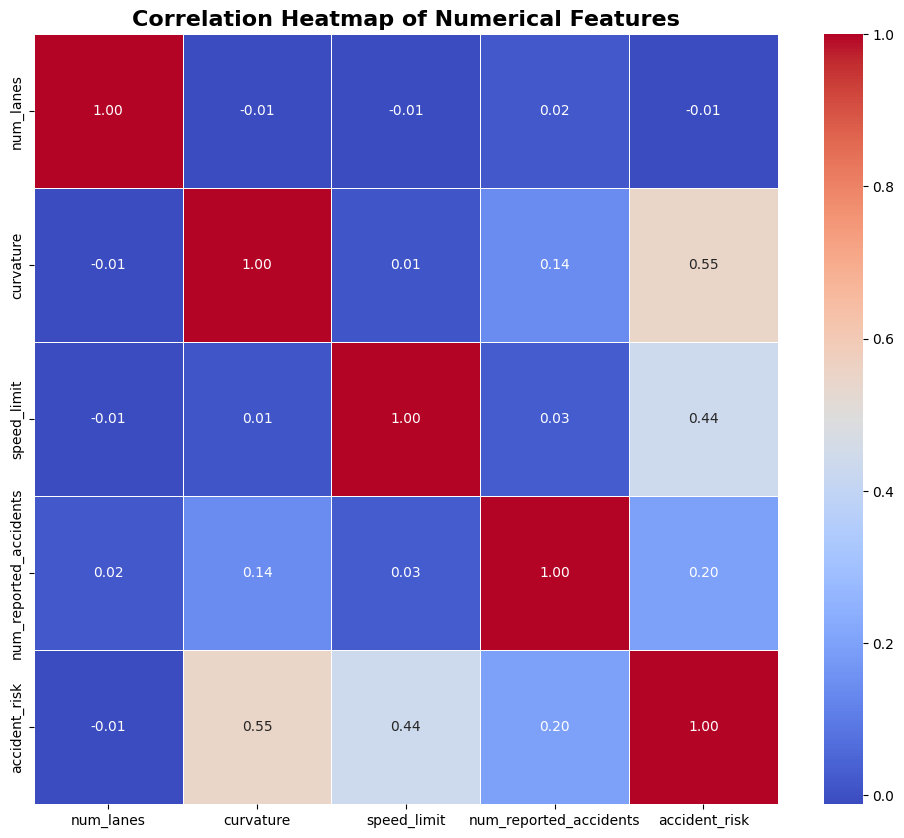

In [0]:
# --- Select all numerical columns, including the target for the correlation matrix ---
numerical_cols_with_target = df_train_sample.select_dtypes(include=np.number).columns.drop(['id'])

# --- Calculate the correlation matrix ---
corr_matrix = df_train_sample[numerical_cols_with_target].corr()

# --- Create the heatmap ---
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, weight='bold')
plt.show()

**Những quan sát từ phân tích đa biến**

Heatmap tương quan mang lại góc nhìn tổng quan về các mối quan hệ tuyến tính giữa toàn bộ các đặc trưng dạng số trong bộ dữ liệu.

**1. Phân tích Mối quan hệ với Biến Mục tiêu (accident_risk)**

Chúng ta nhìn vào hàng cuối cùng (hoặc cột cuối cùng) để xem hệ số tương quan Pearson giữa các đặc trưng (features) và accident_risk.

**- curvature (0.55) - Tương quan Mạnh nhất:**

Đây là yếu tố dự báo quan trọng số 1 (Top Predictor). Hệ số 0.55 là mức tương quan dương khá mạnh.

Ý nghĩa: Độ cong càng lớn, rủi ro càng cao. Điều này xác nhận lại biểu đồ Scatter plot trước đó: đường cong là yếu tố rủi ro chính.

**- speed_limit (0.44) - Tương quan Trung bình Khá:**

Đây là yếu tố quan trọng số 2.

Ý nghĩa: Giới hạn tốc độ càng cao, rủi ro càng lớn. Mức độ ảnh hưởng thấp hơn curvature một chút nhưng vẫn rất đáng kể.

**- num_reported_accidents (0.20) - Tương quan Yếu:**

Có mối liên hệ dương nhưng không mạnh.

Lịch sử tai nạn có đóng góp vào việc dự báo rủi ro hiện tại, nhưng nó không phải là yếu tố quyết định. Có thể do tai nạn là sự kiện ngẫu nhiên (stochastic), không phải lúc nào cũng xảy ra dù điều kiện nguy hiểm.

**- num_lanes (-0.01) - Không có Tương quan (Noise):**

Hệ số xấp xỉ 0. Màu xanh đậm nhất biểu thị sự "lạnh nhạt".

Ý nghĩa: Số làn đường hoàn toàn không có mối quan hệ tuyến tính nào với rủi ro tai nạn. Biến này gần như vô dụng trong mô hình tuyến tính.

**2. Kiểm tra Đa cộng tuyến (Multicollinearity Check)**

Đây là phần thú vị nhất của biểu đồ này. Chúng ta nhìn vào các ô giao nhau giữa các biến đầu vào (ví dụ: curvature vs speed_limit) để xem chúng có phụ thuộc nhau không.

Quan sát tổng thể: Hầu hết các ô giữa các feature đều có màu xanh đậm (blue) với giá trị cực thấp (xoay quanh 0.01 - 0.03).

**- curvature vs. speed_limit (0.01):** Độc lập hoàn toàn!

Phân tích: Thông thường ta hay nghĩ "đường cong thì tốc độ giới hạn phải thấp". Nhưng dữ liệu này nói KHÔNG. Hai biến này không liên quan đến nhau.

Lợi ích cực lớn: Điều này có nghĩa là hai biến này cung cấp thông tin bổ sung (additive information) cho nhau chứ không bị dư thừa. Mô hình sẽ học được rủi ro từ độ cong riêng, và rủi ro từ tốc độ riêng.

**- curvature vs. num_reported_accidents** (0.14):

Có một chút tương quan nhẹ. Những đoạn đường cong hay xảy ra tai nạn hơn một chút, nhưng hệ số 0.14 là quá nhỏ để gây ra vấn đề đa cộng tuyến.

Kết luận về Đa cộng tuyến: Dataset này rất "sạch" về mặt tương quan giữa các biến độc lập. Không có hiện tượng đa cộng tuyến. Bạn không cần dùng các kỹ thuật như PCA (Principal Component Analysis) hay loại bỏ biến do trùng lặp thông tin.

**3. Tổng hợp và Chiến lược Mô hình hóa (Model Strategy)**
Dựa trên Heatmap này kết hợp với các biểu đồ trước, đây là lộ trình:

**- Feature Selection (Chọn lọc đặc trưng):**

Giữ lại: curvature, speed_limit, num_reported_accidents.

Loại bỏ (Drop): num_lanes. Việc giữ biến này chỉ làm tăng độ nhiễu (noise) và độ phức tạp tính toán mà không mang lại giá trị dự báo (gain = 0).

**- Đánh giá tiềm năng mô hình:**

Vì các biến quan trọng (curvature, speed_limit) độc lập với nhau (orthogonal), các mô hình học máy sẽ hội tụ rất nhanh và ổn định.

Mặc dù Heatmap thể hiện tương quan tuyến tính (Pearson), nhưng trước đó ta thấy quan hệ phi tuyến ở curvature (bậc thang). Vì vậy, Heatmap này củng cố việc dùng Tree-based models (Random Forest/XGBoost) nhưng cũng mở ra cơ hội cho Linear Regression nếu bạn thực hiện tốt Feature Engineering (như binning curvature).

**- Insight nghiệp vụ (Business Insight):**

Nếu muốn giảm rủi ro tai nạn, việc giảm số làn đường hay mở rộng làn đường (num_lanes) là vô nghĩa.

Trọng tâm can thiệp phải là cảnh báo ở các đoạn đường cong và kiểm soát tốc độ. Hai yếu tố này hoạt động độc lập, nên có thể áp dụng các biện pháp an toàn riêng biệt cho từng yếu tố mà không sợ bị chồng chéo.

### Test thử SparkMlib

In [0]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

# 1. Tạo indexer cho các cột string
string_cols = [c for c, t in df_train.dtypes if t == "string"]

indexers = [
    StringIndexer(inputCol=c, outputCol=c + "_idx", handleInvalid="keep")
    for c in string_cols
]

pipeline = Pipeline(stages=indexers)
model = pipeline.fit(df_train)
train_indexed = model.transform(df_train)


In [0]:
numeric_cols = ['num_lanes', 'curvature', 'num_reported_accidents', 'speed_limit']
indexed_cols = [c + "_idx" for c in string_cols]

feature_cols = numeric_cols + indexed_cols

target_col = 'accident_risk'

from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=feature_cols,
    outputCol="features"
)

df_ml = assembler.transform(train_indexed).select("features", target_col)
train_df, test_df = df_ml.randomSplit([0.7, 0.3], seed=42)


In [0]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol="features", labelCol=target_col)

lr_model = lr.fit(train_df)


In [0]:
predictions = lr_model.transform(test_df)
predictions.select("prediction", "accident_risk").show(10)


+-------------------+-------------+
|         prediction|accident_risk|
+-------------------+-------------+
|0.12213380846156152|         0.08|
|0.26279648881659323|         0.42|
| 0.2691692252344729|          0.3|
|0.17630206801353876|         0.15|
|0.11985200420685455|         0.18|
|0.12303837241579435|         0.19|
| 0.1262247406247342|         0.15|
| 0.3615739032937281|         0.43|
|0.32060339855462666|         0.32|
| 0.2655203778638542|         0.31|
+-------------------+-------------+
only showing top 10 rows


In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="accident_risk",
    predictionCol="prediction",
    metricName="rmse"
)

rmse = evaluator.evaluate(predictions)
r2 = evaluator.setMetricName("r2").evaluate(predictions)

print("RMSE:", rmse)
print("R2:", r2)


RMSE: 0.09573759594168982
R2: 0.6693506587424818
